In [15]:
using Plots
using DelimitedFiles
using ColorSchemes
using LaTeXStrings

In [16]:
#file = raw"10_h_eff_average_level_statistics_data_13000_13063_12000_12063_11000_11063_10000_10063_6000_6063_5000_5063_4000_4063.txt"
file = "10_average_h_eff_level_statistics_1786_1849.txt"
M = readdlm(file)
eigenvalue_index = M[:,1]; # eigenvalue index
level_stat = M[:,2]; # level stat
level_stat_std = M[:,3]; # level stat std

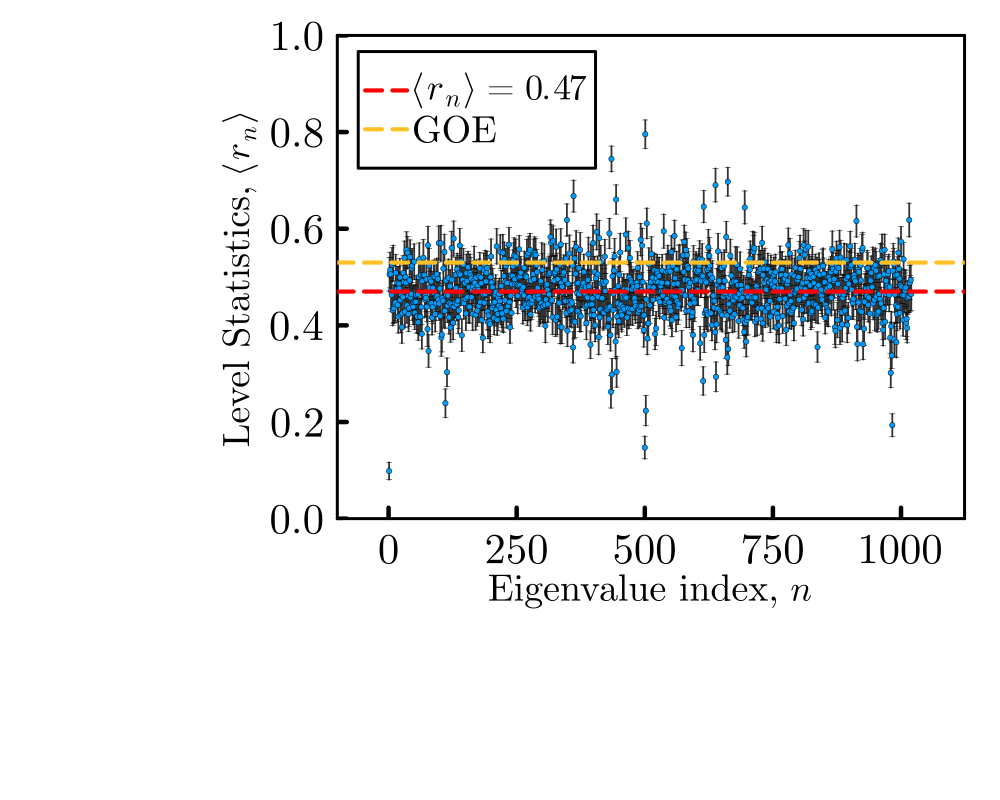

In [23]:
L = 10
MSW = 0.4
Linewidth  = 0.6
Markersize = 1
MarkerStrokeWidth = 0.1;

plot_font = "Computer Modern"
default(fontfamily=plot_font)

p = plot(eigenvalue_index,level_stat,
    yerr = level_stat_std,
    linewidth = Linewidth,
    linecolor = "grey20",
    seriestype = :scatter,
    #markercolor = "blue1",
    markerstrokecolor = "grey0",
    markerstrokewidth=MarkerStrokeWidth,
    markersize=Markersize,
    thickness_scaling = 3,
    xlims=(-100,2^L+100), 
    ylims=(0,1),
    title = "",
    label = "",#L"H_{\textbf{eff}}",
    legend = :topright,
    dpi=300,
    #zcolor = entropy,
    grid = false,
    #colorbar_title = "Average entanglement entropy",
    font="CMU Serif",
    #color = :jet1,
    #:linear_bmy_10_95_c78_n256,#:diverging_rainbow_bgymr_45_85_c67_n256,#:linear_bmy_10_95_c78_n256,#:rainbow1,
    right_margin = Plots.mm,
    left_margin = Plots.mm,
    titlefontsize=10,
    guidefontsize=8,
    tickfontsize=9,
    legendfontsize=8,
    framestyle = :box
    )

#xticks!([0,5000,10000,16000], [L"0",L"5000",L"10000",L"16000"])
#=
Adjust the length of the axis tick.
=#

function ticks_length!(;tl=0.02)
    p = Plots.current()
    xticks, yticks = Plots.xticks(p)[1][1], Plots.yticks(p)[1][1]
    xl, yl = Plots.xlims(p), Plots.ylims(p)
    x1, y1 = zero(yticks) .+ xl[1], zero(xticks) .+ yl[1]
    sz = p.attr[:size]
    r = sz[1]/sz[2]
    dx, dy = tl*(xl[2] - xl[1]), tl*r*(yl[2] - yl[1])
    plot!([xticks xticks]', [y1 y1 .+ dy]', c=:black, labels=false,linewidth = 1.5)
    plot!([x1 x1 .+ dx]', [yticks yticks]', c=:black, labels=false,linewidth = 1.5, xlims=xl, ylims=yl)
    return Plots.current()
end
ticks_length!(tl=0.015)
plot!(size=(1000,800))
hline!([[0.47]],lc=:red,linestyle= :dash, linewidth = 1.4,label = L"\langle r_{n} \rangle = 0.47",legend=:bottomright)
hline!([[0.53]],lc=:goldenrod1,linestyle= :dash, linewidth = 1.4,label = "GOE",legend=:topleft)
xlabel!("Eigenvalue index, "*L"n")
ylabel!("Level Statistics, "*L"\langle r_{n} \rangle")

In [18]:
using Statistics
mean(level_stat)

0.4726977962127094